## Business Goal:

An international e-commerce company based wants to discover key insights from their customer database. They want to use some
of the most advanced machine learning techniques to study their customers. The company sells electronic products.







The company wishes to know from this data of shipment Tracking to answer some of questions:

•	What was Customer Rating? And was the product delivered on time?

•	Is Customer query is being answered?

•	If Product importance is high. having highest rating or being delivered on time?

## Data Dictionary :

## Import Python Libraries:

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Suppress Warnings:
import warnings
warnings.filterwarnings('ignore')

# Reading & Understanding the data

### Importing the Input file

In [2]:
Df = pd.read_csv('train.csv')
Df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Inspect Dataframe

In [3]:
#database dimension

print("Database dimension     :",Df.shape)
print("Database size          :",Df.size)
print("Number of Row          :",len(Df.index))
print("Number of Columns      :",len(Df.columns))

Database dimension     : (10999, 12)
Database size          : 131988
Number of Row          : 10999
Number of Columns      : 12


In [4]:
#checking numerical columns statistics
Df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
#info about the column types etc. 
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Insight:
The data types of the columns are integer and object type. We can see there are no null values in the column.
so no need to inspect the null values.

## Duplicate Analysis

In [6]:
print("Total number of duplicate values in ID column :" , Df.duplicated(subset = 'ID').sum())

Total number of duplicate values in ID column : 0


### Insight:
The ID are unique column and hence I wont need its for prediction

## Data Cleaning

###### Clearly ID are the variable that are just indicative of the ID number of the customer & can be dropped.

In [7]:
#dropping unnecessary columns
Df.drop(columns='ID',inplace=True)
len(Df.columns)

11

In [8]:
Df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [9]:
# Renaming some of the column headers which has long header

Df.rename(columns={'Customer_care_calls':'CustomerCareCalls','Customer_rating':'CustomerRating',
           'Warehouse_block':'WarehouseBlock', 'Mode_of_Shipment':'ShipmentMode',
            'Cost_of_the_Product':'ProductCost','Prior_purchases':'PriorPurchases',
            'Product_importance':'ProductImportance','Discount_offered':'Discount',
             'Weight_in_gms':'Weight(gms)','Reached.on.Time_Y.N':'DeliveredonTime'}, inplace = True)   
Df.columns

Index(['WarehouseBlock', 'ShipmentMode', 'CustomerCareCalls', 'CustomerRating',
       'ProductCost', 'PriorPurchases', 'ProductImportance', 'Gender',
       'Discount', 'Weight(gms)', 'DeliveredonTime'],
      dtype='object')

In [10]:
categorical_col = Df.select_dtypes(exclude =["number"]).columns.values
numerical_col = Df.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['WarehouseBlock' 'ShipmentMode' 'ProductImportance' 'Gender'] 


NUMERICAL FEATURES : 
 ['CustomerCareCalls' 'CustomerRating' 'ProductCost' 'PriorPurchases'
 'Discount' 'Weight(gms)' 'DeliveredonTime'] 


### Warehouse Block

In [11]:
Df.WarehouseBlock.value_counts(normalize=True)*100

F    33.330303
D    16.674243
A    16.665151
B    16.665151
C    16.665151
Name: WarehouseBlock, dtype: float64

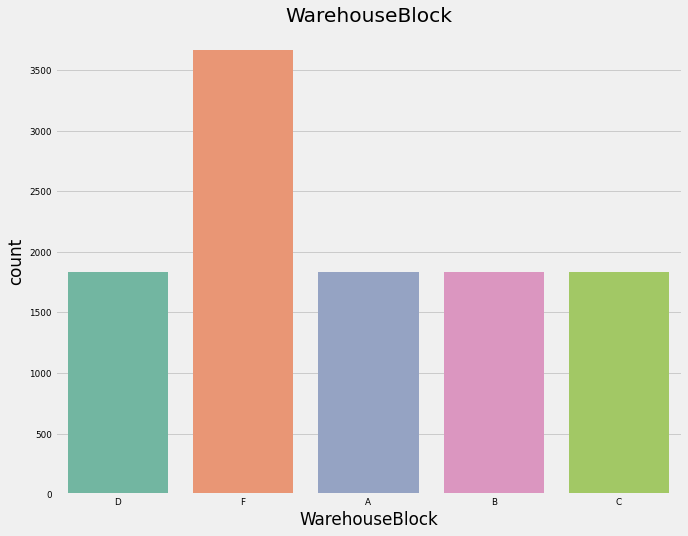

In [12]:
#style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.countplot(Df['WarehouseBlock'],palette = 'Set2')
plt.title('WarehouseBlock')
plt.show()

### Insights:
As we can see that the F Block has stored 33% products which is highest value among other block.

### Shipment Mode

In [13]:
Df.ShipmentMode.value_counts(normalize=True)*100

Ship      67.842531
Flight    16.156014
Road      16.001455
Name: ShipmentMode, dtype: float64

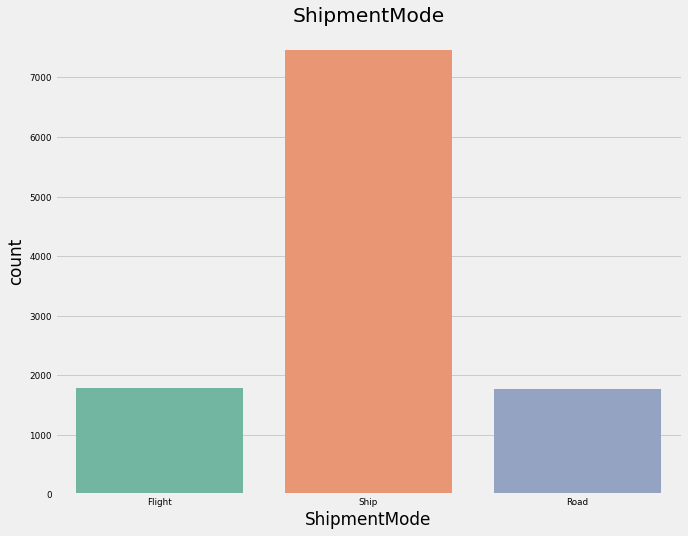

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(Df['ShipmentMode'],palette = 'Set2')
plt.title('ShipmentMode')
plt.show()

### Insights:
Shipment data is heavily counted 67% of products shipped through ship which is high among other shipment Mode Flight or road.

### CustomerRating

In [15]:
Df.CustomerRating.value_counts(normalize=True)*100

3    20.356396
1    20.320029
4    19.901809
5    19.738158
2    19.683608
Name: CustomerRating, dtype: float64

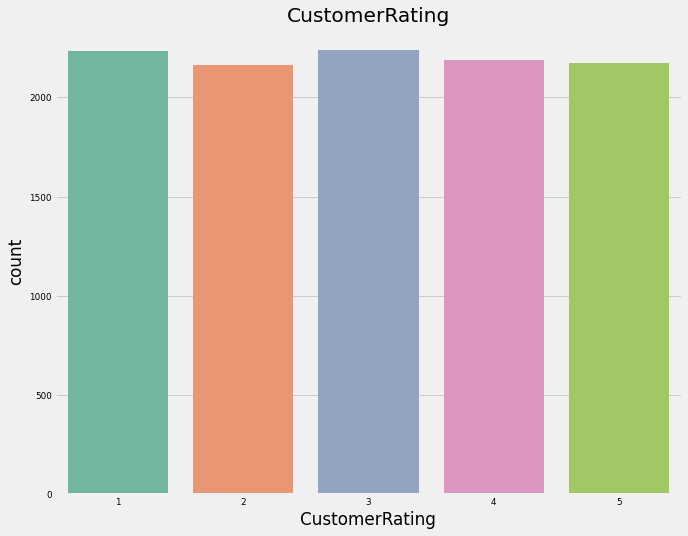

In [16]:
plt.figure(figsize=(10, 8))
sns.countplot(Df['CustomerRating'],palette = 'Set2')
plt.title('CustomerRating')
plt.show()

### CustomerCareCalls

In [17]:
Df.CustomerCareCalls.value_counts(normalize=True)*100

4    32.339304
3    29.248113
5    21.165561
6     9.209928
2     5.800527
7     2.236567
Name: CustomerCareCalls, dtype: float64

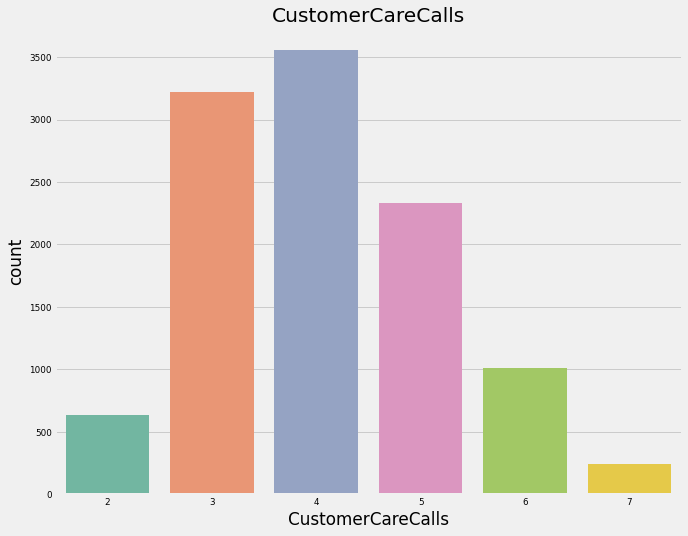

In [18]:
plt.figure(figsize=(10, 8))
sns.countplot(Df['CustomerCareCalls'],palette = 'Set2')
plt.title('CustomerCareCalls')
plt.show()

### Insights:
The  number of calls 4 has seems to be most used as Customer Care Calls by customers and least number of calls are 7 that
was made by customers.

# Exploratory Data Analysis

## Data Imbalance

### Delivered onTime

In [19]:
# 0 for delivered on time and 1 for not delivered on time

DeliveredonTime = Df['DeliveredonTime'].value_counts().rename_axis('unique_values').to_frame('counts')
DeliveredonTime

,counts
unique_values,
1,6563
0,4436


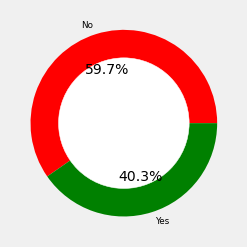

In [20]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(DeliveredonTime.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Insight:
In the DeliveredonTime column , 40.3% has delivered on time where as 59.7% did not delivered on time.
So it seems like a balanced dataset.



# Bivariate Analysis

### CustomerRating & Delivered onTime

In [21]:
pd.crosstab(Df['CustomerRating'],Df['DeliveredonTime'],margins=True, margins_name='Total')

DeliveredonTime,0,1,Total
CustomerRating,,,
1,922,1313,2235
2,892,1273,2165
3,882,1357,2239
4,886,1303,2189
5,854,1317,2171
Total,4436,6563,10999


Text(0.5, 1.0, 'CustomerRating')

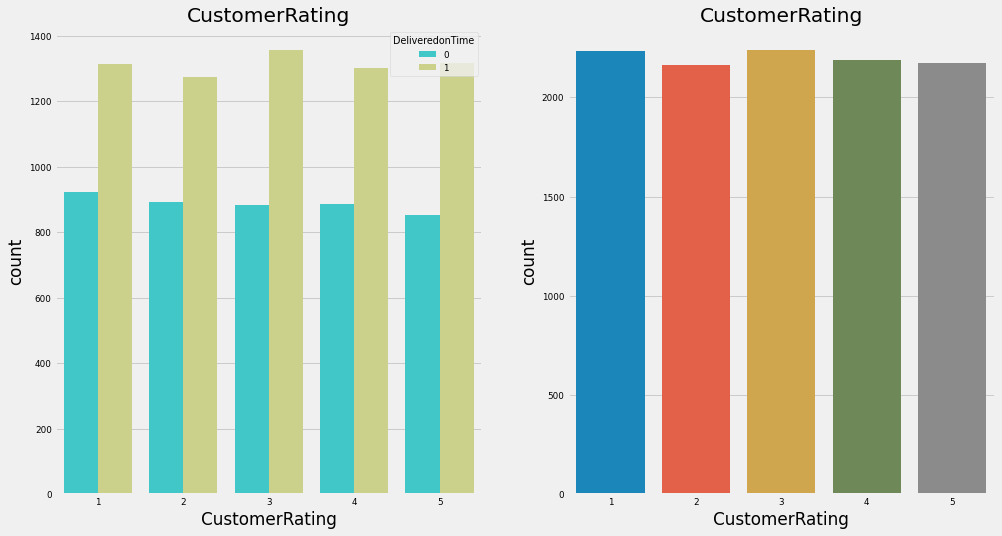

In [22]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='CustomerRating',data=Df,hue= "DeliveredonTime", palette='rainbow')
plt.title("CustomerRating")

plt.subplot(1, 2, 2)
sns.countplot(x='CustomerRating',data=Df)
plt.title("CustomerRating")


### Inference:
The values of customer Rating column seems balanced in count ,there is no such relatioship 
betweeen customer Rating or Product delivered on time or not.

### CustomerCareCalls & CustomerRating

In [23]:
pd.crosstab(Df['CustomerRating'],Df['CustomerCareCalls'],margins=True, margins_name='Total')#,normalize=True)*100


CustomerCareCalls,2,3,4,5,6,7,Total
CustomerRating,,,,,,,
1,130,683,691,491,187,53,2235
2,124,623,717,471,184,46,2165
3,125,656,744,446,214,54,2239
4,123,650,718,450,213,35,2189
5,136,605,687,470,215,58,2171
Total,638,3217,3557,2328,1013,246,10999


Text(0.5, 1.0, 'CustomerCareCalls')

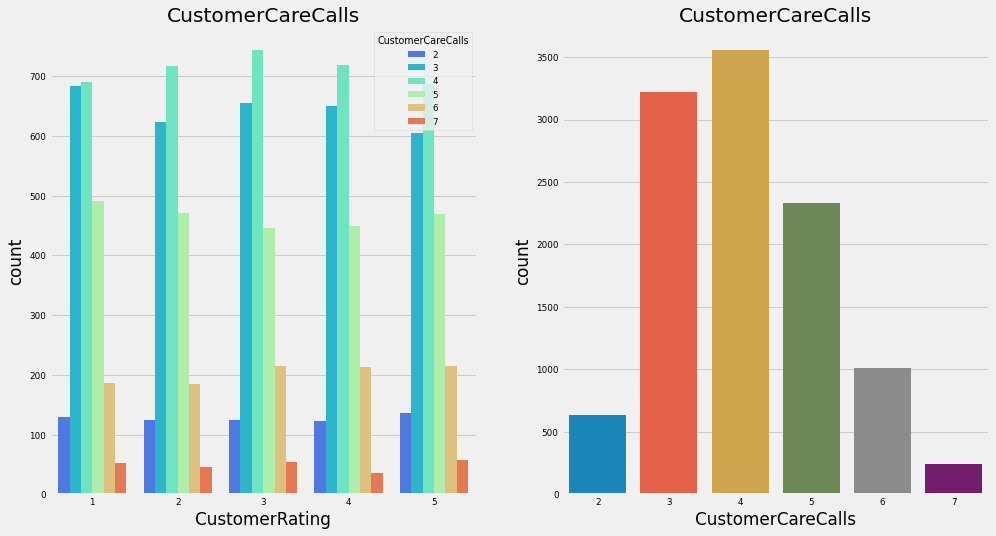

In [24]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(hue='CustomerCareCalls',x='CustomerRating',data=Df,palette='rainbow')
plt.title("CustomerCareCalls")

plt.subplot(1, 2, 2)
sns.countplot(x='CustomerCareCalls',data=Df)
plt.title("CustomerCareCalls")


### Inference:
 In CustomerCareCalls (calls= 4) has high count and (calls=7) has least count  , there are no such relation between the customer
 carecalls or customer Rating that impact product delivery.

### ProductImportance Vs CustomerRating Vs DeliveredonTime

<AxesSubplot:xlabel='ProductImportance', ylabel='count'>

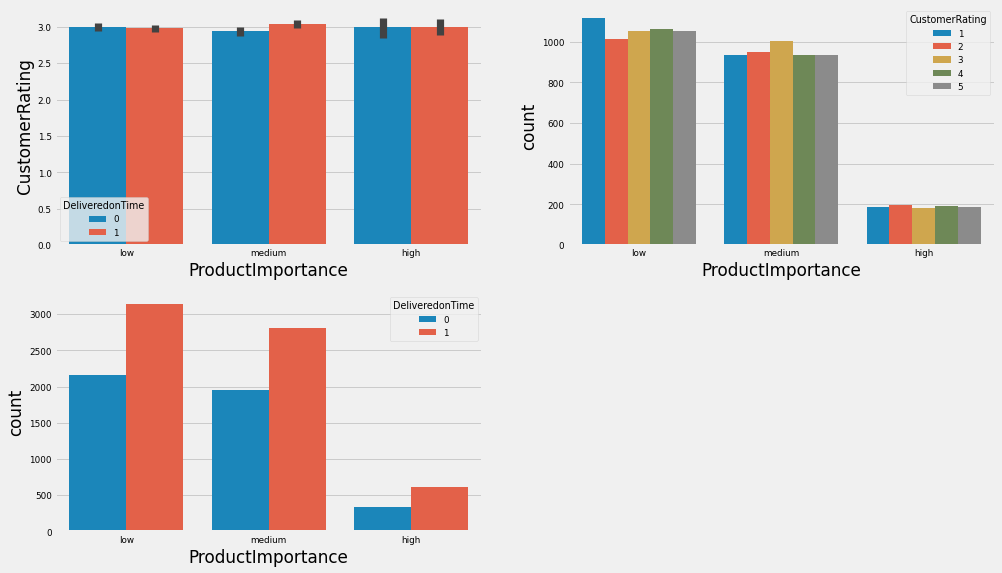

In [25]:
plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
sns.barplot(x=Df['ProductImportance'], y = Df['CustomerRating'], hue = Df['DeliveredonTime'])


plt.subplot(2, 2, 2)
sns.countplot(x='ProductImportance',hue='CustomerRating',data=Df)

plt.subplot(2, 2, 3)
sns.countplot(x='ProductImportance',hue='DeliveredonTime',data=Df)


### Inference:
Product importance has no such relation with Customer Rating or Product delivery Column that impacts on product Importance.


## Univariate Analysis - Numerical
## Detecting Outliers

###  Discount

In [26]:
Df['Discount'].value_counts()

10    860
2     858
6     849
9     845
7     840
     ... 
65     36
26     36
42     35
30     34
25     34
Name: Discount, Length: 65, dtype: int64

<AxesSubplot:xlabel='Discount', ylabel='Density'>

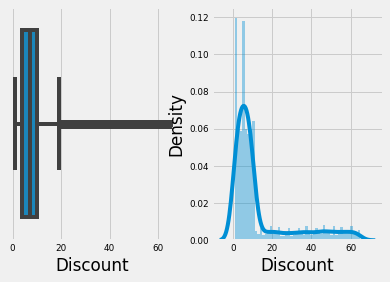

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [27]:
fig, ax = plt.subplots(1,2)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount', data=Df, ax=ax[0])

plt.figure(figsize=(10, 6))
sns.distplot(Df['Discount'],ax=ax[1])

### Insights:
Discount offered 2,10 has almost equal and high in range.

There is no outliers in this column.

### Product cost

In [28]:
Df['ProductCost'].value_counts()

245    110
257    109
260    106
254    101
243    100
      ... 
107      5
99       5
120      5
96       5
122      4
Name: ProductCost, Length: 215, dtype: int64

<Figure size 1080x648 with 0 Axes>

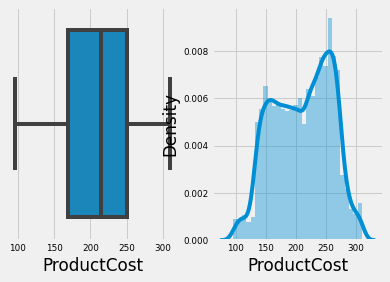

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

In [29]:
fig, ax = plt.subplots(1, 2)

sns.boxplot(x='ProductCost', data=Df, ax=ax[0])
plt.figure(figsize=[15, 9])


sns.distplot(Df['ProductCost'],ax=ax[1])
plt.figure(figsize=[15, 9])


### Insights:
Product Cost 245 or 257 has almost equal and high in range.

There are no outliers in this column.

## Convert Binary Categories

In [30]:
# Replace 
Df['ProductImportance'].replace({'high':3,'medium':2,'low':1},inplace=True)

## Dummy Variables
- Categorical Encoding-
Here I will encode the categorical variables as numeric variables, since machine learning algorithms work on numbers and not text. I will use the pandas get_dummies function which applies one-hot encoding to all the variables passed to it

In [31]:
df = pd.get_dummies(Df,drop_first=True)
df.head()

,CustomerCareCalls,CustomerRating,ProductCost,PriorPurchases,ProductImportance,Discount,Weight(gms),DeliveredonTime,WarehouseBlock_B,WarehouseBlock_C,WarehouseBlock_D,WarehouseBlock_F,ShipmentMode_Road,ShipmentMode_Ship,Gender_M
0,4,2,177,3,1,44,1233,1,0,0,1,0,0,0,0
1,4,5,216,2,1,59,3088,1,0,0,0,1,0,0,1
2,2,2,183,4,1,48,3374,1,0,0,0,0,0,0,1
3,3,3,176,4,2,10,1177,1,1,0,0,0,0,0,1
4,2,2,184,3,2,46,2484,1,0,1,0,0,0,0,0


In [32]:
df.shape

(10999, 15)

<AxesSubplot:>

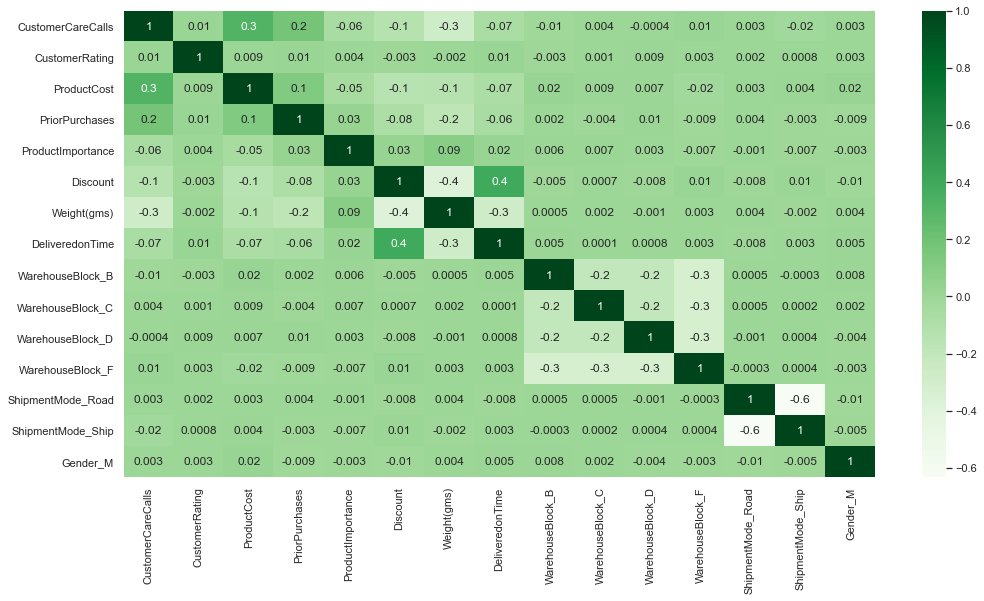

In [33]:
# Visualizing the data using heatmap

sns.set(rc={"figure.figsize":(15,8)})
sns.heatmap(df.corr(),annot=True,cmap='Greens', fmt= '.1g')# Visualizing the data using heatmap

In [34]:
print('Total number of columns after One-Hot Encoding : ',len(df.columns))

Total number of columns after One-Hot Encoding :  15


## Insight:
There are 15 columns in Heatmap which  is not difficult to interpret. 

## Feature Scaling
Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, 
if they were measured on different scales

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()

In [37]:
ss.fit_transform(df)

array([[-0.04771132, -0.7007551 , -0.69072171, ..., -0.4364594 ,
        -1.45247977, -0.99176046],
       [-0.04771132,  1.42157771,  0.12074558, ..., -0.4364594 ,
        -1.45247977,  1.00830799],
       [-1.79988745, -0.7007551 , -0.56588059, ..., -0.4364594 ,
        -1.45247977,  1.00830799],
       ...,
       [ 0.82837675,  0.71413344,  0.66172378, ..., -0.4364594 ,
         0.68847775, -0.99176046],
       [ 0.82837675, -0.7007551 ,  0.26639356, ..., -0.4364594 ,
         0.68847775,  1.00830799],
       [-1.79988745,  1.42157771, -1.14847249, ..., -0.4364594 ,
         0.68847775, -0.99176046]])

## Insight:
Now that we have our Train and Test data bases ready and Train database standardized,
let's try building some model using Logistic Regression.

## Train - Test Split

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
# target variable
target = Df["DeliveredonTime"]
df.drop(columns=['DeliveredonTime'],inplace=True)


x_train,x_test,target_train,target_test = train_test_split(df,target,stratify=target,test_size=.25,random_state=12)

In [40]:
x_train

,CustomerCareCalls,CustomerRating,ProductCost,PriorPurchases,ProductImportance,Discount,Weight(gms),WarehouseBlock_B,WarehouseBlock_C,WarehouseBlock_D,WarehouseBlock_F,ShipmentMode_Road,ShipmentMode_Ship,Gender_M
7488,5,5,250,4,2,8,1247,0,0,1,0,0,1,0
8307,6,2,254,4,1,9,1626,1,0,0,0,0,1,0
9686,5,5,218,5,2,7,1692,0,0,0,0,0,1,0
8855,4,3,268,3,1,10,5998,0,0,0,1,0,1,0
2410,4,1,274,4,2,57,3332,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7313,4,4,253,2,2,5,5624,0,0,0,1,0,1,0
775,3,1,270,3,2,61,3582,0,0,0,1,0,1,0
4068,5,4,243,6,2,1,4170,0,0,1,0,0,1,0
540,3,3,172,3,2,42,1707,0,0,1,0,1,0,0


In [41]:
target_train

7488    1
8307    0
9686    0
8855    0
2410    1
       ..
7313    0
775     1
4068    1
540     1
7948    0
Name: DeliveredonTime, Length: 8249, dtype: int64

In [42]:
target_test

10772    1
8519     0
6273     0
1401     1
3871     1
        ..
5843     1
6364     0
6011     1
5531     1
7335     0
Name: DeliveredonTime, Length: 2750, dtype: int64

In [43]:
x_test

,CustomerCareCalls,CustomerRating,ProductCost,PriorPurchases,ProductImportance,Discount,Weight(gms),WarehouseBlock_B,WarehouseBlock_C,WarehouseBlock_D,WarehouseBlock_F,ShipmentMode_Road,ShipmentMode_Ship,Gender_M
10772,4,4,229,5,2,7,1716,0,0,0,0,0,1,0
8519,2,1,238,2,1,4,4992,0,0,0,1,0,1,0
6273,6,5,251,4,1,8,1038,1,0,0,0,0,1,0
1401,3,5,152,6,1,32,1158,1,0,0,0,0,1,0
3871,4,2,265,4,2,3,4283,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,4,5,134,6,2,7,4881,0,0,0,1,0,1,1
6364,2,4,221,3,1,3,4076,0,1,0,0,0,1,0
6011,7,1,276,4,1,8,1560,0,0,0,1,1,0,0
5531,6,1,308,4,2,1,1216,0,0,0,1,0,1,1


### Insight:
Now that we have our Train and Test data bases ready and Train database standardized, 
let's try building some models using ML Algorithms.

# Model Building
Now we are ready to build a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification problem. We want to identify relationship between output (DeliveredonTime or not) with other variables or features (WarehouseBlock, ShipmentMode, CustomerCareCalls ...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression(logisticRegression), we can narrow down our choice of models to a few:

In [44]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [45]:
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, median_absolute_error

## Model1: Gradient Boosting Classifier()
In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the fascinating idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor.As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.

In [46]:
gbc=GradientBoostingClassifier()

gbc.fit(x_train,target_train)

print("Score the x-train with target-train is : ", str(round(gbc.score(x_train,target_train)*100,2)),"%")
print("Score the x-test  with target-test  is : ", str(round(gbc.score(x_test,target_test)*100,2)),"%")

Y_pred=gbc.predict(x_test)

error_gb = mean_absolute_error(target_test,Y_pred)
print(" Mean squared  error is " , mean_squared_error(target_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(target_test,Y_pred)) 
acc_gb = round(accuracy_score(target_test,Y_pred)*100,2)

Score the x-train with target-train is :  71.29 %
Score the x-test  with target-test  is :  70.18 %
 Mean squared  error is  0.29818181818181816
 Median absolute error is  0.0


# Model 2: Logistic Regression

Logistic Regression is a useful model. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [47]:
lr= LogisticRegression()

lr.fit(x_train,target_train)

print("Score the x-train with target-train is : ", str(round(lr.score(x_train,target_train)*100,2)),"%")
print("Score the x-test  with target-test  is : ", str(round(lr.score(x_test,target_test)*100,2)),"%")

Y_pred=lr.predict(x_test)

error_lr = mean_absolute_error(target_test,Y_pred)
print(" Mean squared  error is " , mean_squared_error(target_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(target_test,Y_pred)) 
acc_lr = round(accuracy_score(target_test,Y_pred)*100,2)

Score the x-train with target-train is :  63.52 %
Score the x-test  with target-test  is :  63.35 %
 Mean squared  error is  0.36654545454545456
 Median absolute error is  0.0


# Model 3 : Random Forest Classifier
The next model Random Forests is one of the most popular. Random forests or  decision tree are an ensemble learning method for classification, regression , that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 


In [48]:
rf= RandomForestClassifier(n_estimators=100,random_state=92)

rf.fit(x_train,target_train)

print("Score the x-train with target-train is : ", str(round(rf.score(x_train,target_train)*100,2)),"%")
print("Score the x-test  with target-test  is : ", str(round(rf.score(x_test,target_test)*100,2)),"%")

Y_pred=rf.predict(x_test)

error_rf = mean_absolute_error(target_test,Y_pred)

print(" Mean squared  error is " , mean_squared_error(target_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(target_test,Y_pred)) 
acc_rf = round(accuracy_score(target_test,Y_pred)*100,2)

Score the x-train with target-train is :  100.0 %
Score the x-test  with target-test  is :  67.24 %
 Mean squared  error is  0.3276363636363636
 Median absolute error is  0.0


## Model 4 : XGB Classifier
XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
XGBoost is an extension to gradient boosted decision trees (GBM) and specially designed to improve speed and performance.

In [990]:
xg= XGBClassifier(random_state=92)

xg.fit(x_train,target_train)

print("Score the x-train with target-train is : ", str(round(xg.score(x_train,target_train)*100,2)),"%")
print("Score the x-test  with target-test  is : ", str(round(xg.score(x_test,target_test)*100,2)),"%")

Y_pred=xg.predict(x_test)

error_xg = mean_absolute_error(target_test,Y_pred)
print(" Mean squared  error is " , mean_squared_error(target_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(target_test,Y_pred)) 

acc_xg = round(accuracy_score(target_test,Y_pred)*100,2)

[23:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score the x-train with target-train is :  91.76 %
Score the x-test  with target-test  is :  67.35 %
 Mean squared  error is  0.3265454545454545
 Median absolute error is  0.0


## Model 5 : SupportVector Classification
Here the model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.



In [991]:
svc = SVC()

svc.fit(x_train,target_train)

print("Score the x-train with target-train is : ", str(round(svc.score(x_train,target_train)*100,2)),"%")
print("Score the x-test  with target-test  is : ", str(round(svc.score(x_test,target_test)*100,2)),"%")

Y_pred=svc.predict(x_test)

error_svc = mean_absolute_error(target_test,Y_pred)
print(" Mean squared  error is " , mean_squared_error(target_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(target_test,Y_pred)) 

acc_svc = round(accuracy_score(target_test,Y_pred)*100,2)

Score the x-train with target-train is :  65.81 %
Score the x-test  with target-test  is :  67.27 %
 Mean squared  error is  0.32727272727272727
 Median absolute error is  0.0


## Model 6 : KNeighbors Classifier
In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 


In [992]:
knn = KNeighborsClassifier()

knn.fit(x_train,target_train)

print("Score the x-train with target-train is : ", str(round(knn.score(x_train,target_train)*100,2)),"%")
print("Score the x-test  with target-test  is : ", str(round(knn.score(x_test,target_test)*100,2)),"%")

Y_pred=knn.predict(x_test)

error_knn = mean_absolute_error(target_test,Y_pred)
print( " Mean absolute error is ",mean_squared_error(target_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(target_test,Y_pred)) 

acc_knn = round(accuracy_score(target_test,Y_pred)*100,2)

Score the x-train with target-train is :  78.09 %
Score the x-test  with target-test  is :  64.8 %
 Mean absolute error is  0.352
 Median absolute error is  0.0


## Inferences:
We have a stable model as Model No. 1 Where the model confidence score is the highest among other models evaluated and Mean
absolute error values are below 30%. We will select Model 1 as our final model.



## Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While Gradient Boosting Classifier
gives the highest score and less mean absolute error compare to other models, so we choose to use GradientBoosting.




In [993]:
models = pd.DataFrame({
    'Model': ['GradientBoosting','Logistic Regression','Random Forest',
               'XGB Classifier','Support Vector Machines', 'KNN',],
    'Score': [acc_gb, acc_lr, acc_rf, 
              acc_xg, acc_svc, acc_knn,] ,
    'mean_absolute_error' : [error_gb, error_lr, error_rf,
                            error_xg,
                            error_svc, error_knn]})
models.sort_values(by=['Score','mean_absolute_error'], ascending=False)

,Model,Score,mean_absolute_error
0,GradientBoosting,70.25,0.297455
3,XGB Classifier,67.35,0.326545
4,Support Vector Machines,67.27,0.327273
2,Random Forest,67.24,0.327636
5,KNN,64.80,0.352000
1,Logistic Regression,63.35,0.366545
